# Homework 1 REPORT

Big Data Analytics
<br>
Student: Assem Kussainova

In Homework 1 was given the task to implement several classification algorithms and classify the given dataset upon 2 classes. Moreover, it was needed to compare several algorithms, including Linear Discriminant Analysis (LDA), Support Vector Machine (SVM), k nearest neighbors (kNN) and Decision Tree Classifier according their accuracy score. In order to achieve this goal, dataset was separated on train and test data during the KFold cross validation with 10 iterations. 

# 1. LDA classification

LDA tries to find a decision boundary around each cluster of a class. It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible. The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set.

Following is the code used for data classification purposes. Before working with data it was decided which libraries for reading, analysis, visualization and storing into file will be imported. Below, libraries needed for the LDA algorithm are written.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Next, train data is read from the .txt file (2 - 4 columns are features, 5 column is target).

In [2]:
train = pd.read_csv("bda-hw-m-train.txt", header = None)
x = train.values[:, 1:4]
y = train.values[:, -1]

There, Linear Discriminant Analysis for classification was run and predicted values using cross validation with 10 iterations.

In [3]:
lda = LinearDiscriminantAnalysis()
y_pred = cross_val_predict(lda, x, y, cv = 10)

Accuracy score, which evaluates the build model, using the difference between actual and predicted taarget values is calculated.

In [4]:
print('Accuracy: ', accuracy_score(y, y_pred))

Accuracy:  0.8567741935483871


On the plot below, different accuracy scores for each iteration during cross validation are observed.

Text(0, 0.5, 'Accuracy')

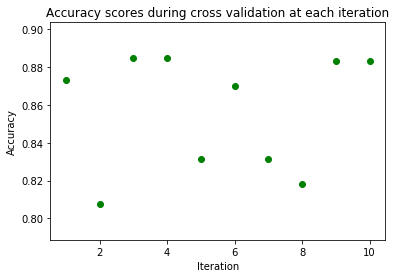

In [5]:
plt.scatter(np.linspace(1, 10, 10), cross_val_score(lda, x, y, cv = 10), c = "green")
plt.title("Accuracy scores during cross validation at each iteration")
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

Now, the test data is read from the file (1 column is index for bookkeeping, 2 - 4 columns are features).

In [6]:
test = pd.read_csv("bda-hw-m-test-dist.txt", header = None)
index = test.values[:, 0]
x_test = test.values[:, 1:]

Built model applied to the test dataset and new target values are obtained. 

In [7]:
lda.fit(x, y)
y_pred = lda.predict(x_test)

Finally, index and predicted target values are saved into .csv file according to the reqirements.

In [8]:
with open('kussainova-lda-hw1.csv', 'w', newline = '') as f:
    writer = csv.writer(f)

    for i in range(len(index)):
        writer.writerow([index[i], y_pred[i]])

    f.close()

# 2. SVM classification

A support vector machine (SVM) is a type of supervised machine learning classification algorithm.
<br><br>
SVM differs from the other classification algorithms in the way that it chooses the decision boundary that maximizes the distance from the nearest data points of all the classes. The most optimal decision boundary is the one which has maximum margin from the nearest points of all the classes.

The steps for SVM are the same as from LDA code, except the part where the best value of gamma parameter is calculated. Following is the realization of SVM algorithm using the "rbf" kernel. Gamma array is initialized for future selection of parameter with best accuracy using the "for" loop.

In [9]:
from sklearn.svm import SVC

gamma = np.linspace(0.01, 10, num = 100)

accuracy = []
gammas = []

for i in gamma:
    svc = SVC(kernel = 'rbf', gamma = i)
    y_pred = cross_val_predict(svc, x, y, cv = 10)

    score = accuracy_score(y, y_pred)
    accuracy.append(score)
    gammas.append(i)

best_value = gammas[np.argmax(accuracy)]
print('Highest accuracy: ', max(accuracy))
print('Best parameter: ', best_value)

Highest accuracy:  0.9883870967741936
Best parameter:  5.761818181818182


Text(0, 0.5, 'Accuracy')

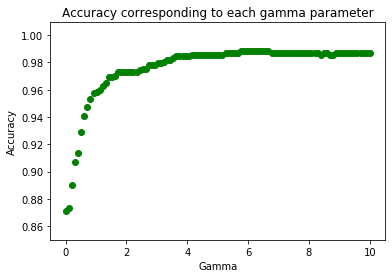

In [10]:
plt.scatter(gammas, accuracy, c = "green")
plt.title("Accuracy corresponding to each gamma parameter")
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

In [11]:
svc = SVC(kernel = 'rbf', gamma = best_value)
svc.fit(x, y)
y_pred = svc.predict(x_test)

In [12]:
with open('kussainova-svm-hw1.csv', 'w', newline = '') as f:
    writer = csv.writer(f)

    for i in range(len(index)):
        writer.writerow([index[i], y_pred[i]])

    f.close()

The SVM algorithm best accuracy score equal to 98.83% was achieved with gamma parameter value equal to 5.7618 taking the default value for cost C = 1. Accuracy corresponding to each gamma parameter on the graph has rising trend from 87% to approximately 98% and then changes are becoming small at remaining part of gamma interval. Classification results are written to .csv file. 

# 3. kNN classification

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

The steps for kNN are the same as from SVM part, including the findings of best parameter value (k number of neighbors for kNN). Following is the realization of algorithm. K array is initialized for future selection of parameter with best accuracy using the "for" loop.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

k = np.linspace(1, 40, num = 40, dtype = int)

accuracy = []
neighbors = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)    
    y_pred = cross_val_predict(knn, x, y, cv = 10)

    score = accuracy_score(y, y_pred)
    accuracy.append(score)
    neighbors.append(i)

best_value = neighbors[np.argmax(accuracy)]
print('Highest accuracy: ', max(accuracy))
print('Best parameter: ', best_value)

Highest accuracy:  0.9870967741935484
Best parameter:  8


Text(0, 0.5, 'Accuracy')

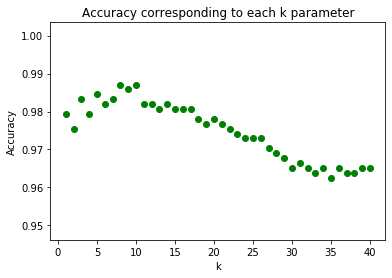

In [14]:
plt.scatter(neighbors, accuracy, c = "green")
plt.title("Accuracy corresponding to each k parameter")
plt.xlabel('k')
plt.ylabel('Accuracy')

In [15]:
knn = KNeighborsClassifier(n_neighbors = best_value)
knn.fit(x, y)
y_pred = knn.predict(x_test)

In [16]:
with open('kussainova-knn-hw1.csv', 'w',  newline = '') as f:
    writer = csv.writer(f)

    for i in range(len(index)):
        writer.writerow([index[i], y_pred[i]])

    f.close()

For the KNN algorithm best k number of neighbors was 8, whose accuracy is 98.71%. From the graph reflecting accuracy corresponding to each k parameter in the model is seen that it steadely rises between k equal from 1 to 10, and then there is a tendency that as more number of neighbors are in the model, the less accuracy it has. Classification results are written to .csv file.

# 4. Decision Tree Classification

A decision tree is one of most frequently and widely used supervised machine learning algorithms that can perform both regression and classification tasks. 
<br><br>
For each attribute in the dataset, the decision tree algorithm forms a node, where the most important attribute is placed at the root node. For evaluation we start at the root node and work our way down the tree by following the corresponding node that meets our condition or "decision". This process continues until a leaf node is reached, which contains the prediction or the outcome of the decision tree.

The steps for Decision Tree are the same as from kNN code part, including the findings of best parameter value such as depth and type of splitter. Following is the realization of algorithm. Depth array is initialized for future selection of parameter with best accuracy using the "for" loop.

In [17]:
from sklearn.tree import DecisionTreeClassifier

depth = range(1, 100)

accuracy_default = []
depths_default = []

for i in depth:
    dtc = DecisionTreeClassifier(max_depth = i, random_state = 42)
    y_pred = cross_val_predict(dtc, x, y, cv = 10)

    score = accuracy_score(y, y_pred)
    accuracy_default.append(score)
    depths_default.append(i)
    
best_value = depths_default[np.argmax(accuracy_default)]
print('Highest accuracy (default splitter): ', max(accuracy_default))
print('Best depth (default splitter): ', best_value)

Highest accuracy (default splitter):  0.9703225806451613
Best depth (default splitter):  9


Text(0, 0.5, 'Accuracy')

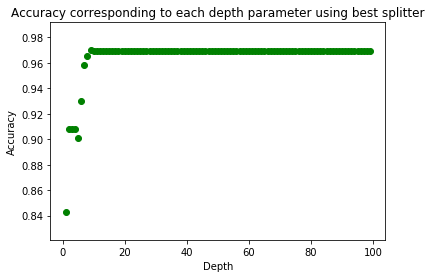

In [18]:
plt.scatter(depths_default, accuracy_default, c = "green")
plt.title("Accuracy corresponding to each depth parameter using best splitter")
plt.xlabel('Depth')
plt.ylabel('Accuracy')

In [19]:
accuracy_random = []
depths_random = []

for i in depth:
    dtc = DecisionTreeClassifier(max_depth = i, splitter = 'random',  random_state = 42)
    y_pred = cross_val_predict(dtc, x, y, cv = 10)

    score = accuracy_score(y, y_pred)
    accuracy_random.append(score)
    depths_random.append(i)

best_value_random = depths_random[np.argmax(accuracy_random)]
print('Highest accuracy (random splitter): ', max(accuracy_random))
print('Best depth (random splitter): ', best_value_random)

Highest accuracy (random splitter):  0.9561290322580646
Best depth (random splitter):  17


Text(0, 0.5, 'Accuracy')

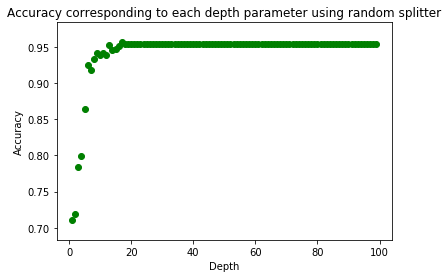

In [20]:
plt.scatter(depths_random, accuracy_random, c = "green")
plt.title("Accuracy corresponding to each depth parameter using random splitter")
plt.xlabel('Depth')
plt.ylabel('Accuracy')

Following is the code for choosing the best parameters for the final model from obtained results of accuracy.

In [21]:
d = [best_value, best_value_random]
a = [max(accuracy_default), max(accuracy_random)]
splitters = ['best', 'random']
i = np.argmax(a)
d_final = d[i]
splitter_final = splitters[i]
print ('Depth: ', d_final, '\nSplitter: ', splitter_final)

Depth:  9 
Splitter:  best


In [22]:
dtc = DecisionTreeClassifier(max_depth = d_final, splitter = splitter_final)
dtc.fit(x, y)
y_pred = dtc.predict(x_test)

In [23]:
with open('kussainova-dtc-hw1.csv', 'w', newline = '') as f:
    writer = csv.writer(f)

    for i in range(len(index)):
        writer.writerow([index[i], y_pred[i]])

    f.close()

As for Decision Tree Classifier, it was found that ‘best’ splitter works with higher accuracy than ‘random’ one with the difference of 2%, and the corresponding depth for ‘best’ splitter with accuracy 97.03% is 9. From the 'best' graph it is seen that accuracy sharply increased at key point and remains constant then. 'Random' graph has similar trends, however accuracy peak is reached at much higher depth and has less value than in 'best' splitter. Classification results are written to .csv file.

# Dataset features visualization

Moreover, it was requested to provide geometrical desciption and to build several scatter plots of the train data according their features which are used for classification in order to examine some patterns.

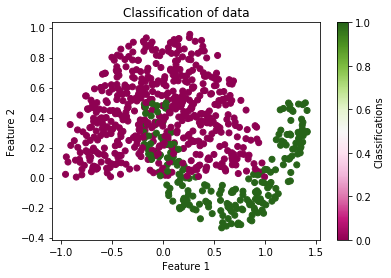

In [24]:
f1 = plt.scatter(train.values[:, 1], train.values[:, 2], c = y, cmap = 'PiYG')
plt.title("Classification of data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

color = plt.colorbar()
color.set_label(label = 'Classifications')

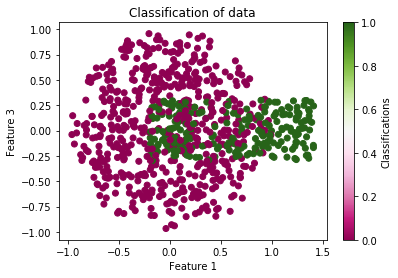

In [25]:
f2 = plt.scatter(train.values[:, 1], train.values[:, 3], c = y, cmap = 'PiYG')
plt.title("Classification of data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')

color = plt.colorbar()
color.set_label(label = 'Classifications')

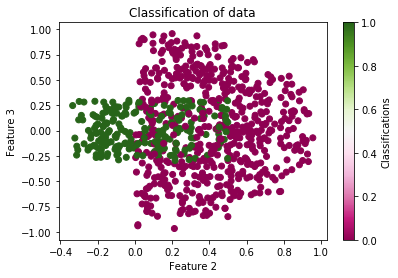

In [26]:
f3 = plt.scatter(train.values[:, 2], train.values[:, 3], c = y, cmap = 'PiYG')
plt.title("Classification of data")
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')

color = plt.colorbar()
color.set_label(label = 'Classifications')

As seen from the plots, we separated each feature from the given train dataset and plotted values with each other in order to observe which features have more influence on data classification. From the graph is seen that Features 1 and 2 are mostly influence the classification outcome. This conclusion was made by looking at the shapes of data congestion and their interception (first diagram: trapezoid and semi-arc have slight interception; second diagram: circle and rectangle mostly joint; third diagram: rectangle mostly enters the semi-circle). As a result on the first diagram data points much better represent different classes than in last two. 

# Conclusion

All the tasks given for this Homework1 were done and all the goals were achieved. During this work several classification algorithms were studied and compared with each other according their performance. The least accurate algorithm was identified as Linear Discriminant Analysis, whose accuracy estimated about 85.68%. In comparison with LDA, all remaining algorithms KNN, SVM and Decision Tree Classifier performed much better, with accuracy score near 100%. The overall results you can see below.
1. LDA - 85.68%
2. SVM (rbf kernel, gamma = 5.7618) - 98.83% 
3. kNN (k = 8) - 98.71%
4. Decision tree (depth = 9, splitter = best) - 97.03% 
<br><br>
This results may differ from another students as different methods of cross validation and different parameters for classifiers were used.